# Applying XND on your data analysis workflow

This document show some ways to apply **XND** on a data analysis workflow.

Basically, a data analysis workflow has 5 main task groups:

- domain acknolodge
- data storage
- data cleaning
- data processing
- data visualization

This document focus on the last 3 task groups: data cleaning, processing and visualization.

Some examples will be discussed using **xnd** with **gumath** integrated with other libraries

## Setup

First we need to import some libraries

In [1]:
import sys

In [2]:
from importnb import Notebook
from IPython.display import display
import random 
from xnd import xnd

In [3]:
xnd_gumath = Notebook.load('utils/math_utils.ipynb', main=True).xnd_gumath

## Data Process

The data processing tasks aim to work on raw/cleaning data and get information from that. *Digital Signal Processing*, *Machine Learning*, *Math*, *Statistics*, *Scientific Computing*, etc are some possible approaches that someone want to work with data. This document shows some operations with: *Math*

### Math operations

XND math operations could be done using *gumath*. The follow examples use a class that combine *xnd* and *gumath* libraries (@ [xnd_gumath](utils/math_utils.ipynb)). **libgumath** is an C library that supports a general dispatch mechanism for **xnd** containers as well as a composable, generalized function concept.

**Binary operations:**

In [4]:
# using arrays from a dictionary
v = xnd_gumath({'x': [1, 2, 3], 'y': [4, 5, 6]})
# add
v['x'] + v['y']

xnd([5, 7, 9], type='3 * int64')

In [5]:
# assign from dictionary
x = v['x']
y = v['y']
# subtract
x - y

xnd([-3, -3, -3], type='3 * int64')

In [6]:
# multiplication
x * y

xnd([4, 10, 18], type='3 * int64')

In [7]:
# division
xnd_gumath(10, type='int32') / 2

xnd(5, type='int32')

In [8]:
# or
20 / xnd_gumath(10, type='int32')

xnd(2, type='int32')

In [9]:
x = xnd_gumath(1.0)
x.sin(), x.cos()

(xnd(0.8414709848078965, type='float64'),
 xnd(0.5403023058681398, type='float64'))

### Processing using SciPy

*SciPy* (pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering ([www.scipy.org](https://www.scipy.org/)). 

This section shows examples using some methods from **SciPy** library.

In [10]:
import scipy

In [11]:
x = xnd([random.uniform(0, 100) for x in range(100)])
y = xnd([random.uniform(0, 100) for x in range(100)])

x.type, y.type

(ndt("100 * float64"), ndt("100 * float64"))

In [12]:
scipy.dot(x, y)

230931.5421682946

**Statstics functions** 

SciPy could be used to process some statistical functions on **xnd** arrays:

In [13]:
print('Mean of x =', scipy.mean(x))

Mean of x = 51.10352114212457


In [14]:
print('Median of y =', scipy.median(y))

Median of y = 42.117034694883316


In [15]:
print('Standard Deviation of x =', scipy.std(x))

Standard Deviation of x = 27.69640514378039


In [16]:
print('Variance of y =', scipy.var(y))

Variance of y = 869.348316652364


**Signal Processing functions**

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

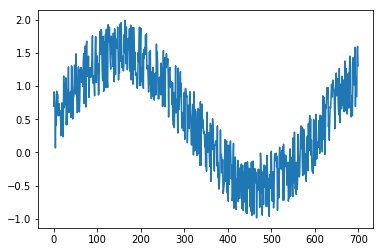

In [18]:
n_samples = 700

raw_data = xnd_gumath([v/100.0 for v in range(n_samples)]).sin()
raw_data += xnd_gumath([random.uniform(0, 1) for x in range(n_samples)]) 

plt.plot(raw_data)
plt.show()

/mnt/sda1/storage/miniconda/envs/xnd-notebooks/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


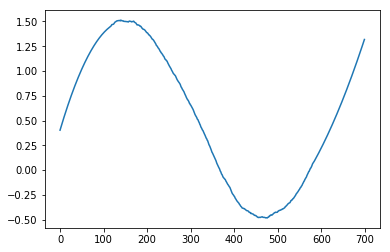

In [19]:
filtered_data = savgol_filter(raw_data, window_length=n_samples//3, polyorder=2)

plt.plot(filtered_data)
plt.show()

### Processing using scikit-learn

**scikit-learn** is a Python module for machine learning built on top of SciPy ([github.com/scikit-learn/scikit-learn](https://github.com/scikit-learn/scikit-learn)).

The follow example shows PCA working with **xnd** array.

In [20]:
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

/mnt/sda1/storage/miniconda/envs/xnd-notebooks/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/mnt/sda1/storage/miniconda/envs/xnd-notebooks/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [21]:
X = xnd([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

pca = PCA(n_components=2)
pca.fit(X)

print('explained_variance_ratio:', pca.explained_variance_ratio_)  
print('singular_values:', pca.singular_values_)  

explained_variance_ratio: [0.99244289 0.00755711]
singular_values: [6.30061232 0.54980396]


## Data Visualization

Communication is a very important task on a data analysis workflow. 

This section shows **XND** working with **matplotlib**.

### Plotting with matplotlib

In [22]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [23]:
x = xnd_gumath([v/100.0 for v in range(1000)])

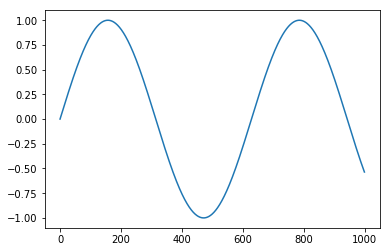

In [24]:
plt.plot(x.sin())
plt.show()

In [25]:
# Install version_information if not installed
#!pip install version_information
%load_ext version_information
%version_information matplotlib, xnd, gumath, scipy

Software versions
Python 3.6.6 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.5.0
OS Linux 4.15.0 29 generic x86_64 with debian buster sid
matplotlib 2.2.3
xnd 0.2.0.dev3
gumath 0.2.0.dev3
scipy 1.1.0
Fri Aug 17 16:46:05 2018 -04